In [12]:
# import numpy as np
import cupy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
data  = pd.read_csv('train.csv')

In [14]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [16]:
Y_train

array([0, 3, 3, ..., 8, 2, 0], dtype=int64)

In [17]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    Y = np.asarray(Y)
    one_hot_Y = np.zeros((Y.size, int(Y.max()) + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [18]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in np.arange(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [19]:
%%time

W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 2000)

Iteration:  0
[3 8 5 ... 5 8 5] [0 3 3 ... 8 2 0]
0.07890243902439024
Iteration:  10
[4 8 6 ... 4 7 5] [0 3 3 ... 8 2 0]
0.16895121951219513
Iteration:  20
[4 1 6 ... 4 3 0] [0 3 3 ... 8 2 0]
0.24385365853658536
Iteration:  30
[4 1 6 ... 4 3 0] [0 3 3 ... 8 2 0]
0.3090731707317073
Iteration:  40
[4 1 0 ... 4 3 0] [0 3 3 ... 8 2 0]
0.35478048780487803
Iteration:  50
[4 1 0 ... 4 3 0] [0 3 3 ... 8 2 0]
0.39826829268292685
Iteration:  60
[4 1 0 ... 2 3 0] [0 3 3 ... 8 2 0]
0.4429512195121951
Iteration:  70
[4 1 0 ... 2 3 0] [0 3 3 ... 8 2 0]
0.4846829268292683
Iteration:  80
[4 1 0 ... 2 3 0] [0 3 3 ... 8 2 0]
0.5215609756097561
Iteration:  90
[4 1 0 ... 2 3 0] [0 3 3 ... 8 2 0]
0.5539268292682927
Iteration:  100
[8 1 0 ... 2 3 0] [0 3 3 ... 8 2 0]
0.5803170731707317
Iteration:  110
[8 1 0 ... 2 3 0] [0 3 3 ... 8 2 0]
0.6064146341463414
Iteration:  120
[8 1 0 ... 5 3 0] [0 3 3 ... 8 2 0]
0.6281707317073171
Iteration:  130
[8 1 0 ... 5 3 0] [0 3 3 ... 8 2 0]
0.6471463414634147
Iteration:  

In [20]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image.get(), interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


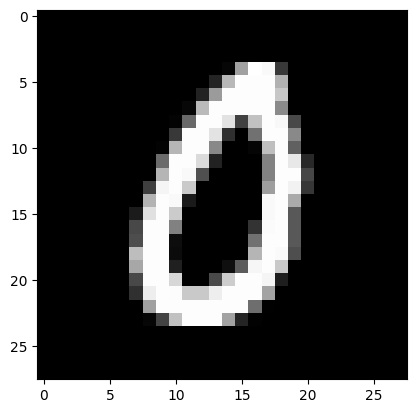

Prediction:  [1]
Label:  3


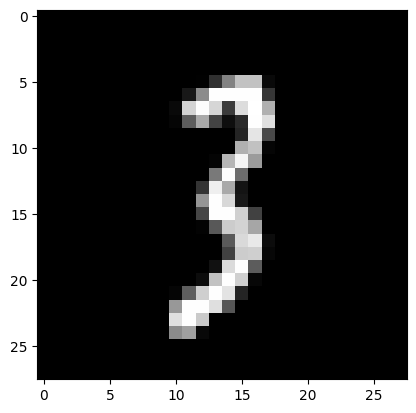

Prediction:  [5]
Label:  3


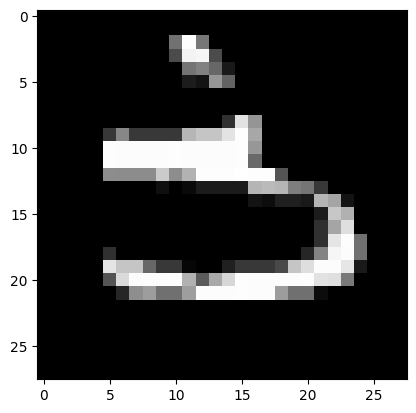

Prediction:  [9]
Label:  4


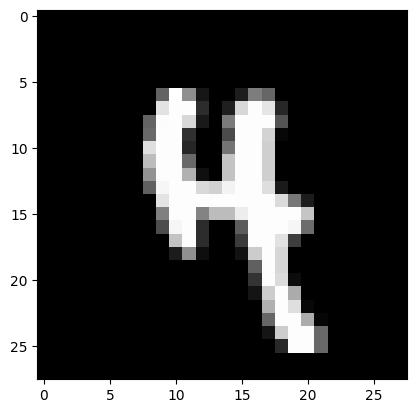

CPU times: total: 141 ms
Wall time: 358 ms


In [21]:
%%time

test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [22]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 9 0 9 3 6 1 8 8 7 7 2 1 8 8 5 4 2 3 9 2 0 0 3 0 9 7 4 0 1 0 6 6 7 3 4 3
 3 2 0 8 7 8 5 6 6 2 7 6 2 6 2 8 4 4 6 6 6 5 1 5 4 9 0 7 8 6 1 0 2 3 0 9 6
 9 7 3 6 0 6 3 1 3 0 3 1 1 4 8 9 6 1 3 0 0 7 2 7 2 7 5 1 8 6 1 7 4 8 4 1 1
 2 7 6 3 3 9 9 3 9 3 0 4 6 9 4 3 3 2 8 4 9 7 0 9 8 0 1 0 1 2 6 3 2 6 9 5 7
 4 5 7 2 6 7 3 2 7 5 9 0 9 7 5 1 5 3 2 2 3 4 1 6 1 8 3 5 7 6 5 1 4 9 0 3 3
 9 5 9 6 0 6 0 9 6 7 4 4 6 7 2 8 2 8 9 6 7 2 8 0 4 3 1 2 1 0 4 2 9 1 7 3 7
 4 4 8 8 5 8 8 5 2 7 3 7 8 8 0 4 4 1 9 1 2 5 7 3 6 3 0 5 2 0 6 9 2 9 1 2 4
 7 2 1 8 3 9 7 7 3 6 0 2 9 3 3 1 9 9 6 9 6 8 6 8 0 7 6 9 4 1 4 1 3 2 2 8 3
 9 2 7 6 4 6 6 7 0 4 8 2 9 8 3 1 6 0 3 3 1 1 5 3 0 7 8 0 5 0 0 1 8 9 5 9 5
 6 9 4 5 2 9 6 3 0 5 3 9 1 3 7 3 4 6 9 3 1 9 9 8 0 5 7 7 6 9 1 7 2 6 1 1 5
 7 6 1 7 7 6 9 0 3 2 9 3 7 4 7 5 4 6 5 4 6 9 2 0 7 9 8 3 1 2 0 7 4 4 2 1 8
 6 2 3 2 5 3 5 8 0 3 4 4 4 5 1 6 1 8 3 5 4 1 7 0 9 8 6 2 9 1 6 4 9 1 7 6 9
 1 2 0 3 6 3 8 9 1 7 6 5 7 1 5 4 4 6 6 3 7 2 6 7 7 4 8 5 6 4 2 7 2 4 7 6 0
 9 8 9 0 0 4 0 3 1 6 1 6 

array(0.901)